In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (24, 16)
import datetime
import seaborn as sns
import os
from scipy.fft import fft, fftfreq
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler

In [111]:
breathing_data = pd.read_csv("data/D1NAMO/diabetes_subset/001/sensor_data/2014_10_01-10_09_39/2014_10_01-10_09_39_Breathing.csv")
breathing_data["Time"] = pd.to_datetime(breathing_data["Time"], format="%d/%m/%Y %H:%M:%S.%f")

In [112]:
breathing_data.set_index("Time", inplace=True)

In [127]:
b2b =  pd.read_csv("data/D1NAMO/diabetes_subset/001/sensor_data/2014_10_01-10_09_39/2014_10_01-10_09_39_BB.csv")

In [137]:
breathing_data.iloc[range(0,500,50)]

,BreathingWaveform
Time,
2014-10-01 10:09:39.417,7083082
2014-10-01 10:09:41.417,7118304
2014-10-01 10:09:43.417,7107951
2014-10-01 10:09:45.417,7100640
2014-10-01 10:09:47.417,7174710
2014-10-01 10:09:49.417,7187999
2014-10-01 10:09:51.417,7187144
2014-10-01 10:09:53.417,7184530
2014-10-01 10:09:55.417,7184636


In [129]:
b2b.head(10)

,Time,BtoB
0,NaN,6000
1,NaN,1610
2,NaN,6970
3,NaN,2960
4,NaN,1520
5,NaN,910
6,NaN,10600
7,NaN,5290
8,NaN,12600
9,NaN,5010


In [116]:
test = pd.DataFrame(breathing_data.values[25:])  -pd.DataFrame(breathing_data.values[:-25])

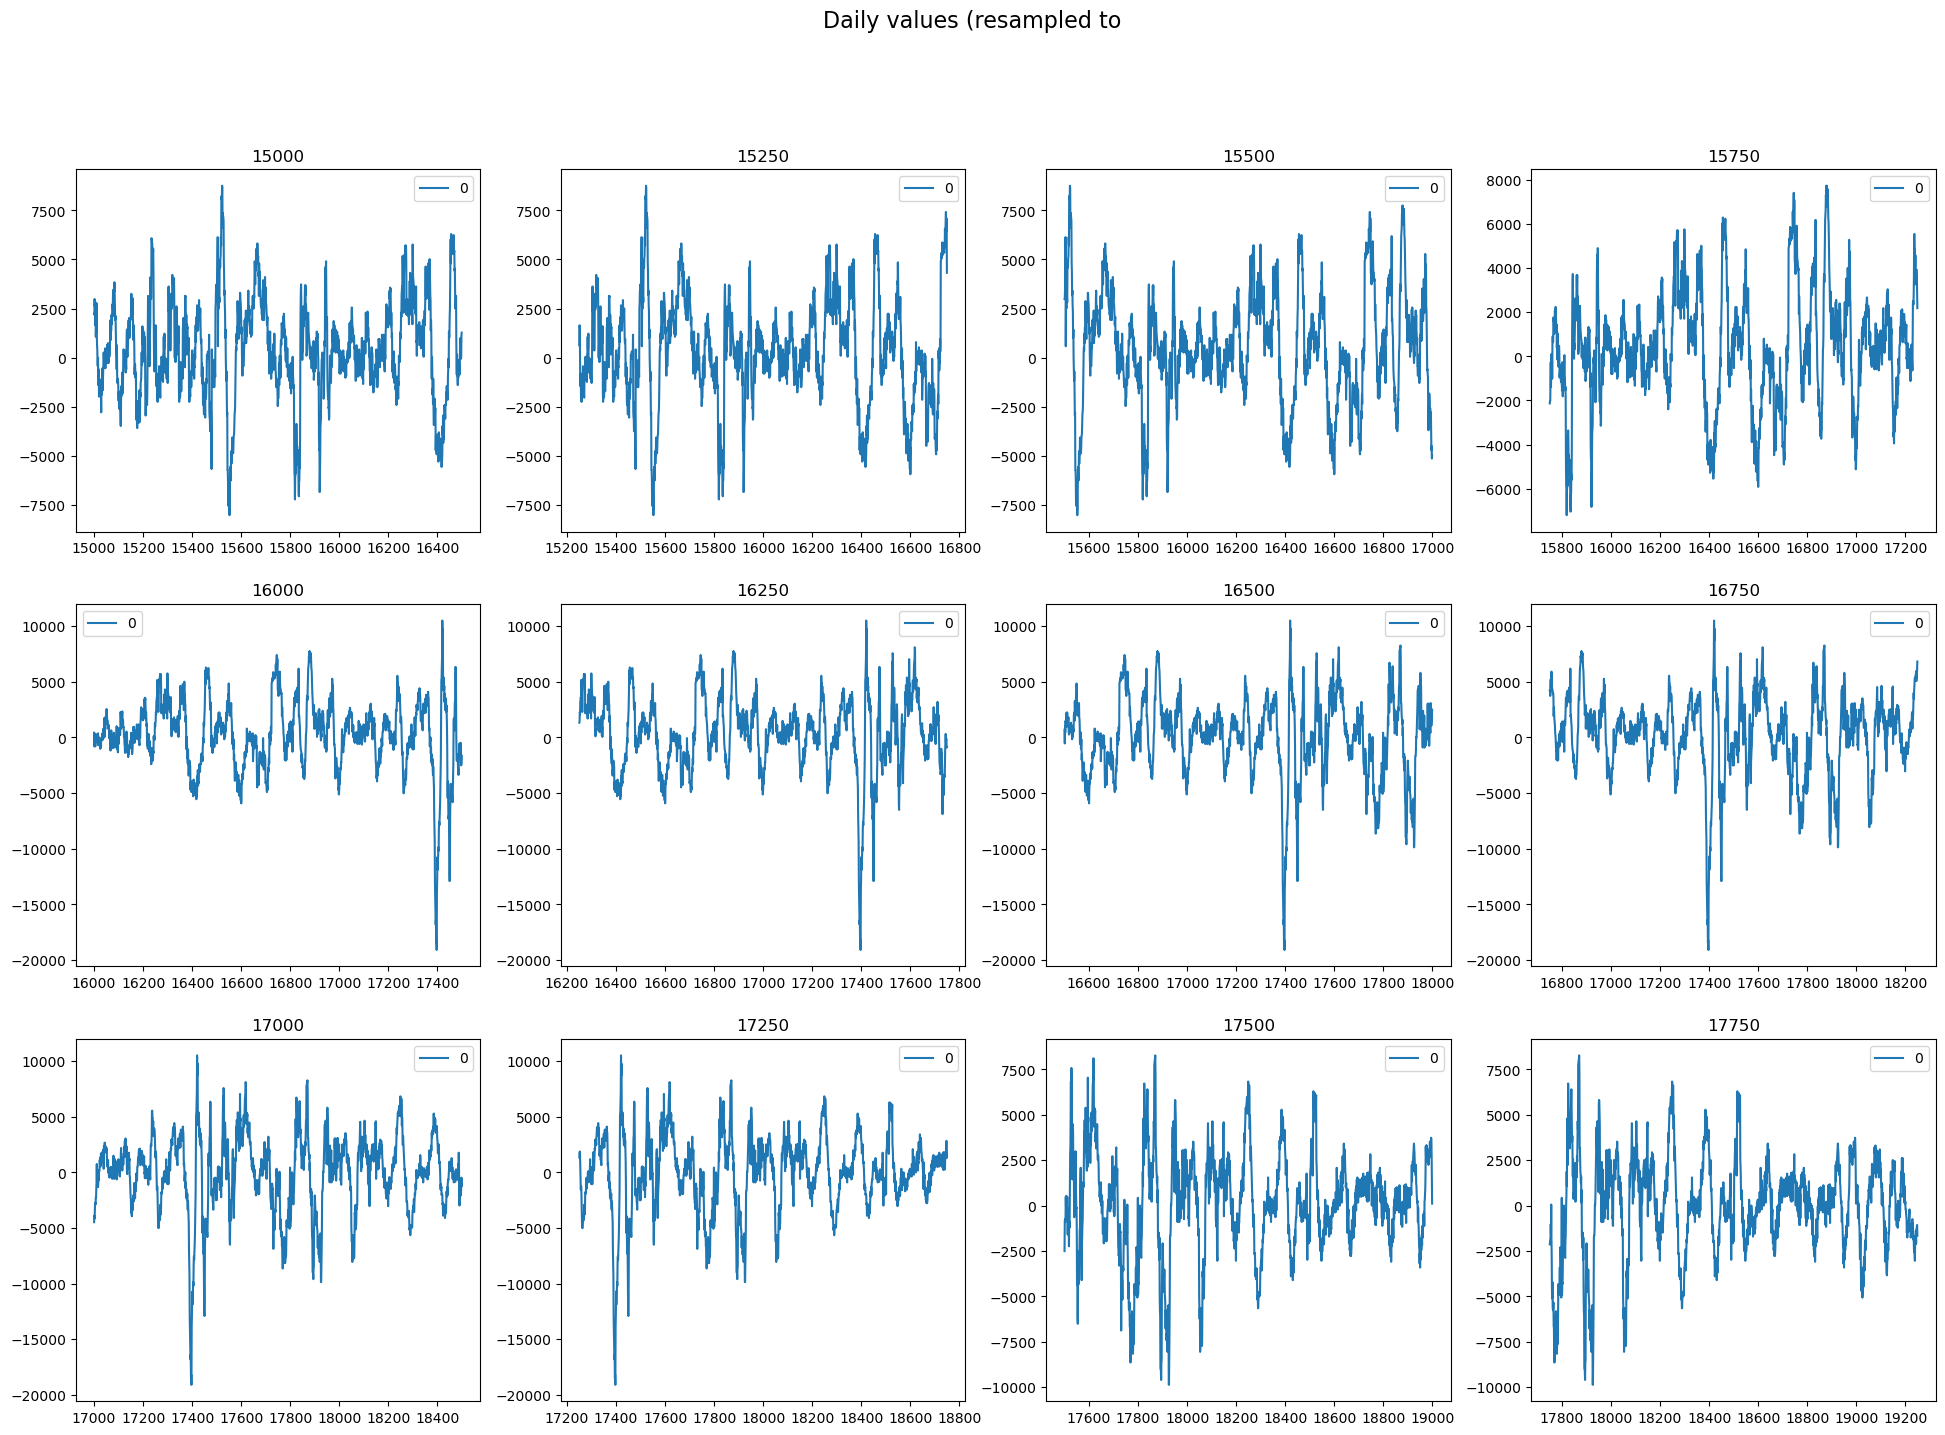

In [120]:
fig, axes = plt.subplots(3, 4)
axes_list = [[i, j] for i in range(3) for j in range(4)]
fig.suptitle(f"Daily values (resampled to ", fontsize=16);
n= 250
start = 15000
end = start + (n * 12)
for i, start_point in enumerate(range(start,end,n)):
    axes[axes_list[i][0], axes_list[i][1]].set_title(start_point)
    sns.lineplot(data=test[start_point:start_point+1500], ax=axes[axes_list[i][0], axes_list[i][1]])
plt.show();

<AxesSubplot:xlabel='Time'>

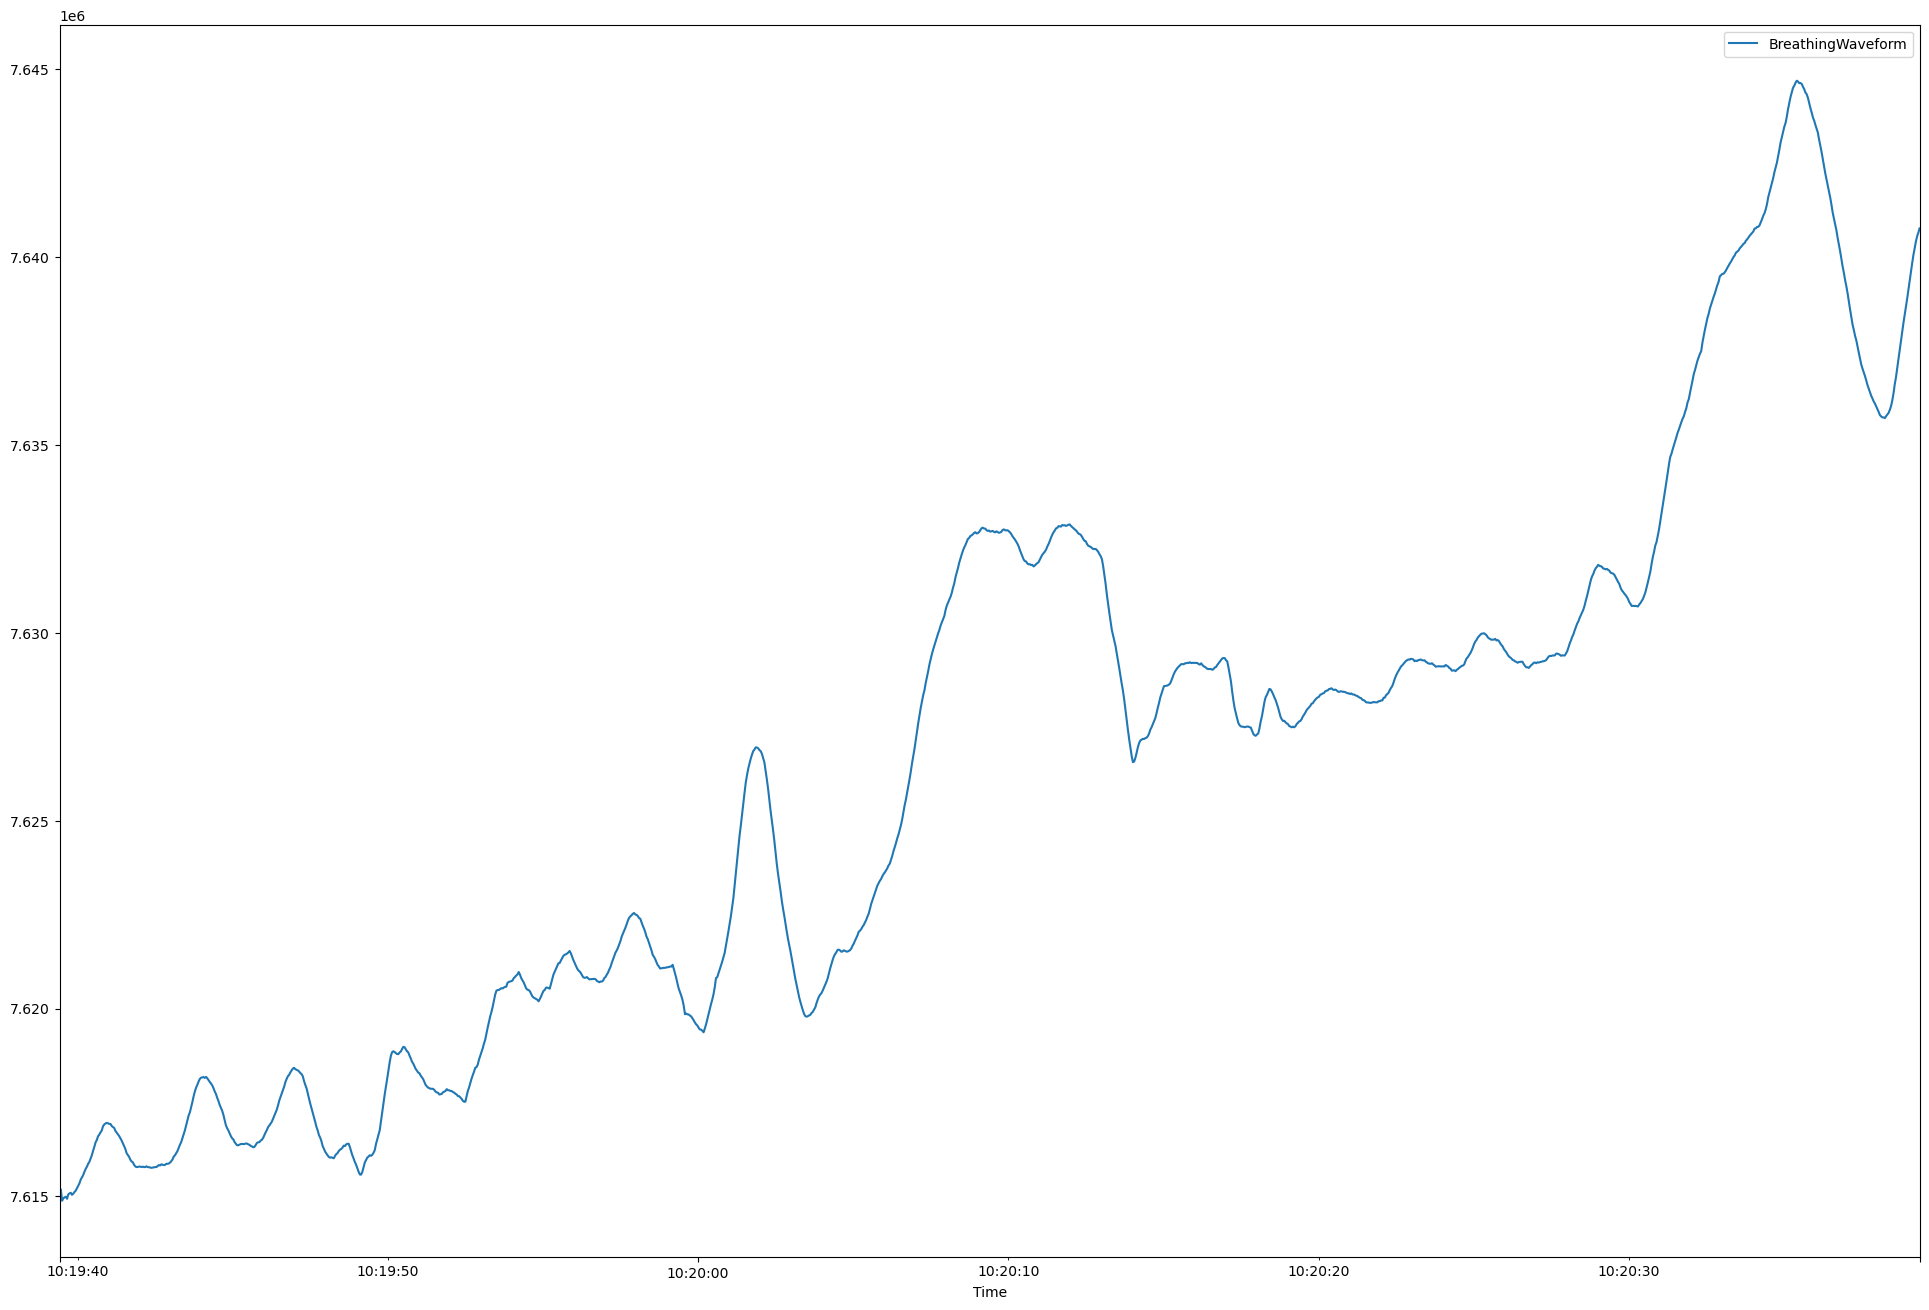

In [101]:
breathing_data[15000:16500].rolling(25, min_periods=1).mean().plot()

scaler = StandardScaler()
scaler.fit(breathing_data)

breathing_data["BreathingWaveform"] = scaler.transform(breathing_data)

In [22]:
sma_25 = breathing_data.rolling(25*60, min_periods=1).std().dropna()

In [70]:
test_detrend = pd.DataFrame(breathing_data[1:].values) - pd.DataFrame(breathing_data.values[:-1])

In [79]:
breathing_data[1:].values - test_detrend

,0
0,7083082
1,7149789
2,7154538
3,7154538
4,7154538
...,...
1100669,9262409
1100670,9266144
1100671,9260755
1100672,9260061


In [72]:
test_detrend

,0
0,66707
1,4749
2,0
3,0
4,2882
...,...
1100669,3735
1100670,-5389
1100671,-694
1100672,6137


<AxesSubplot:>

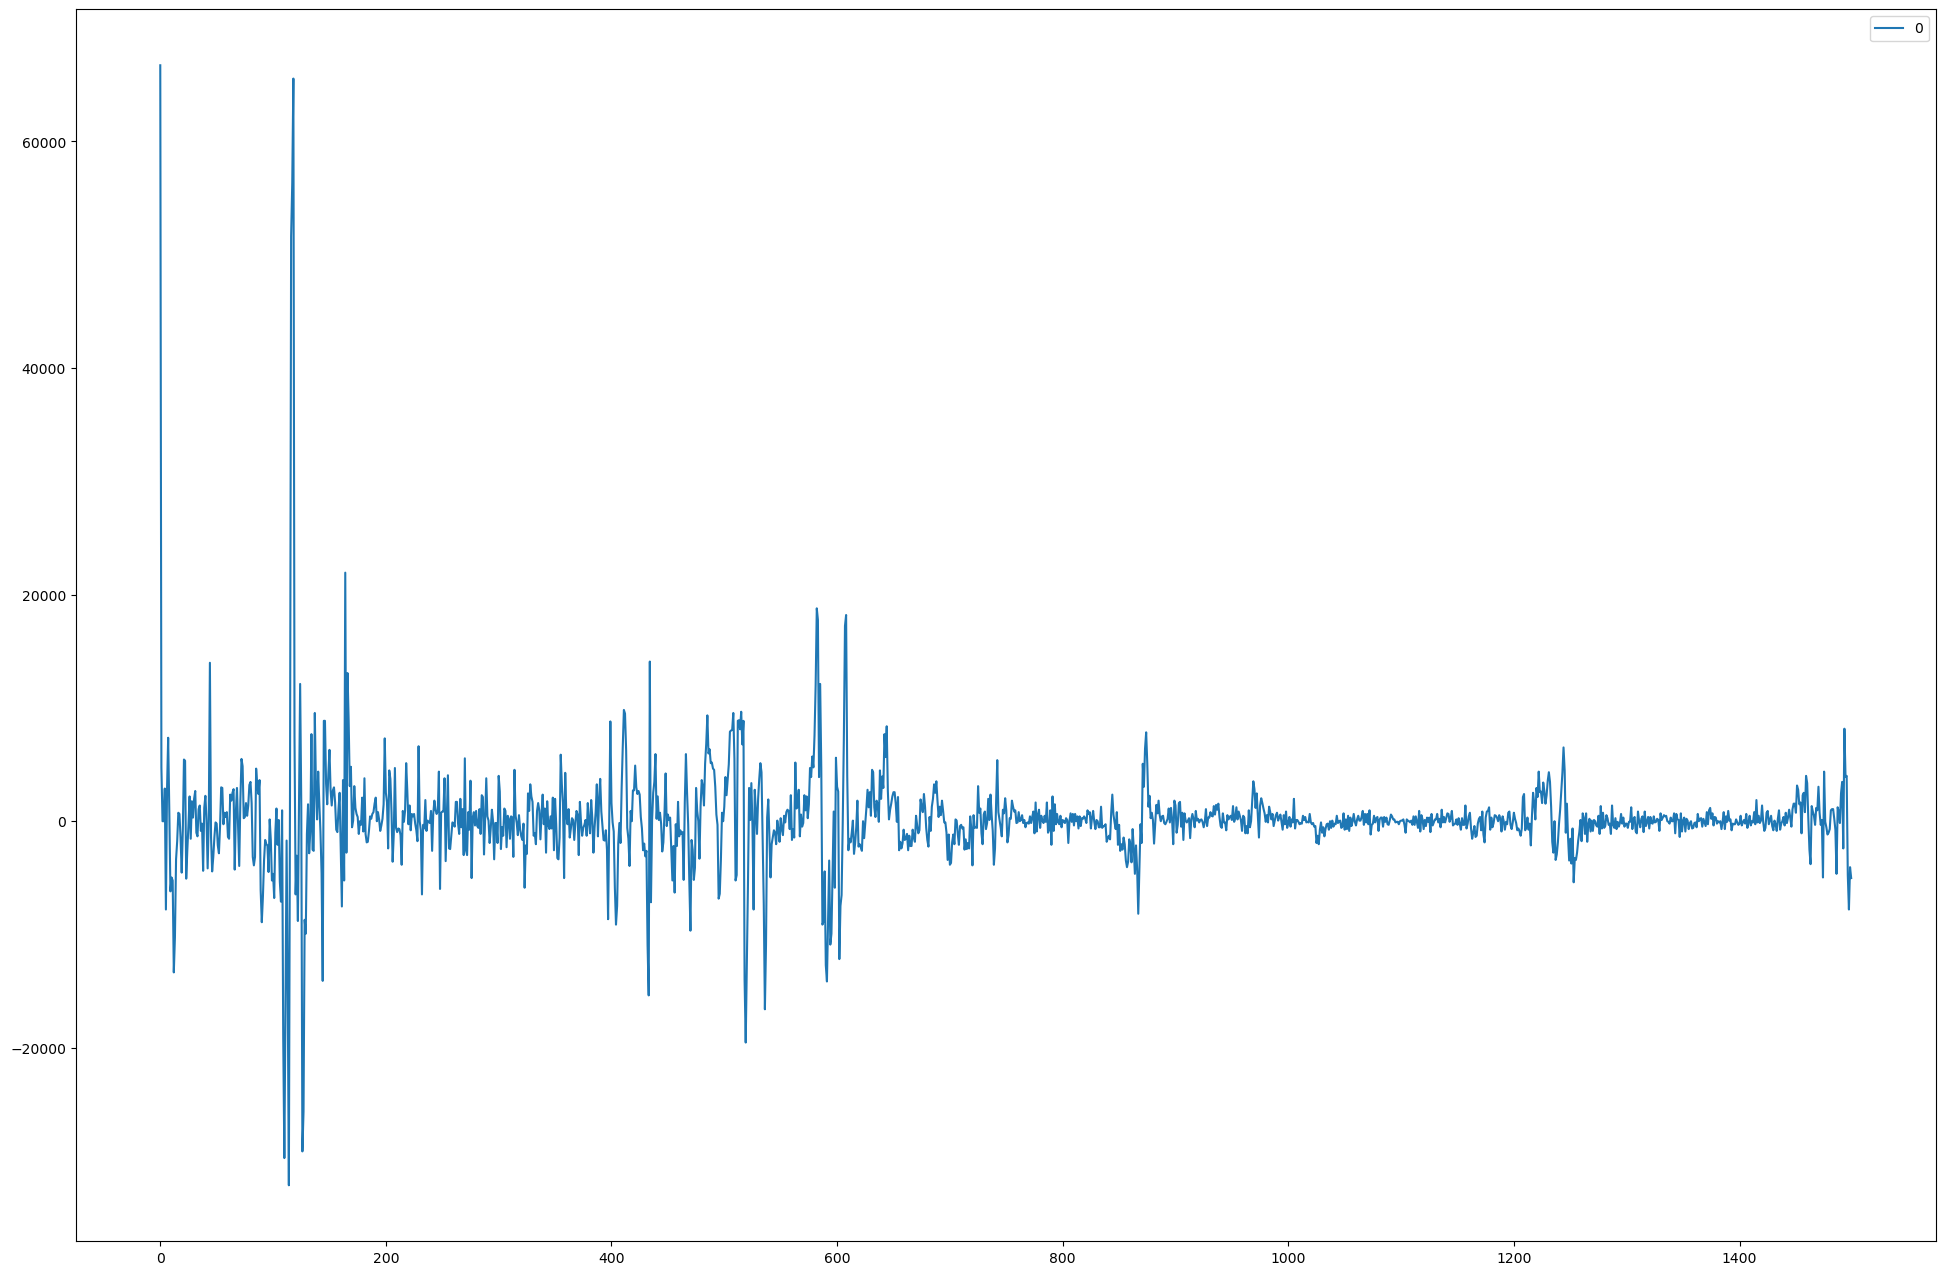

In [76]:
test_detrend[:1500].plot()

<AxesSubplot:>

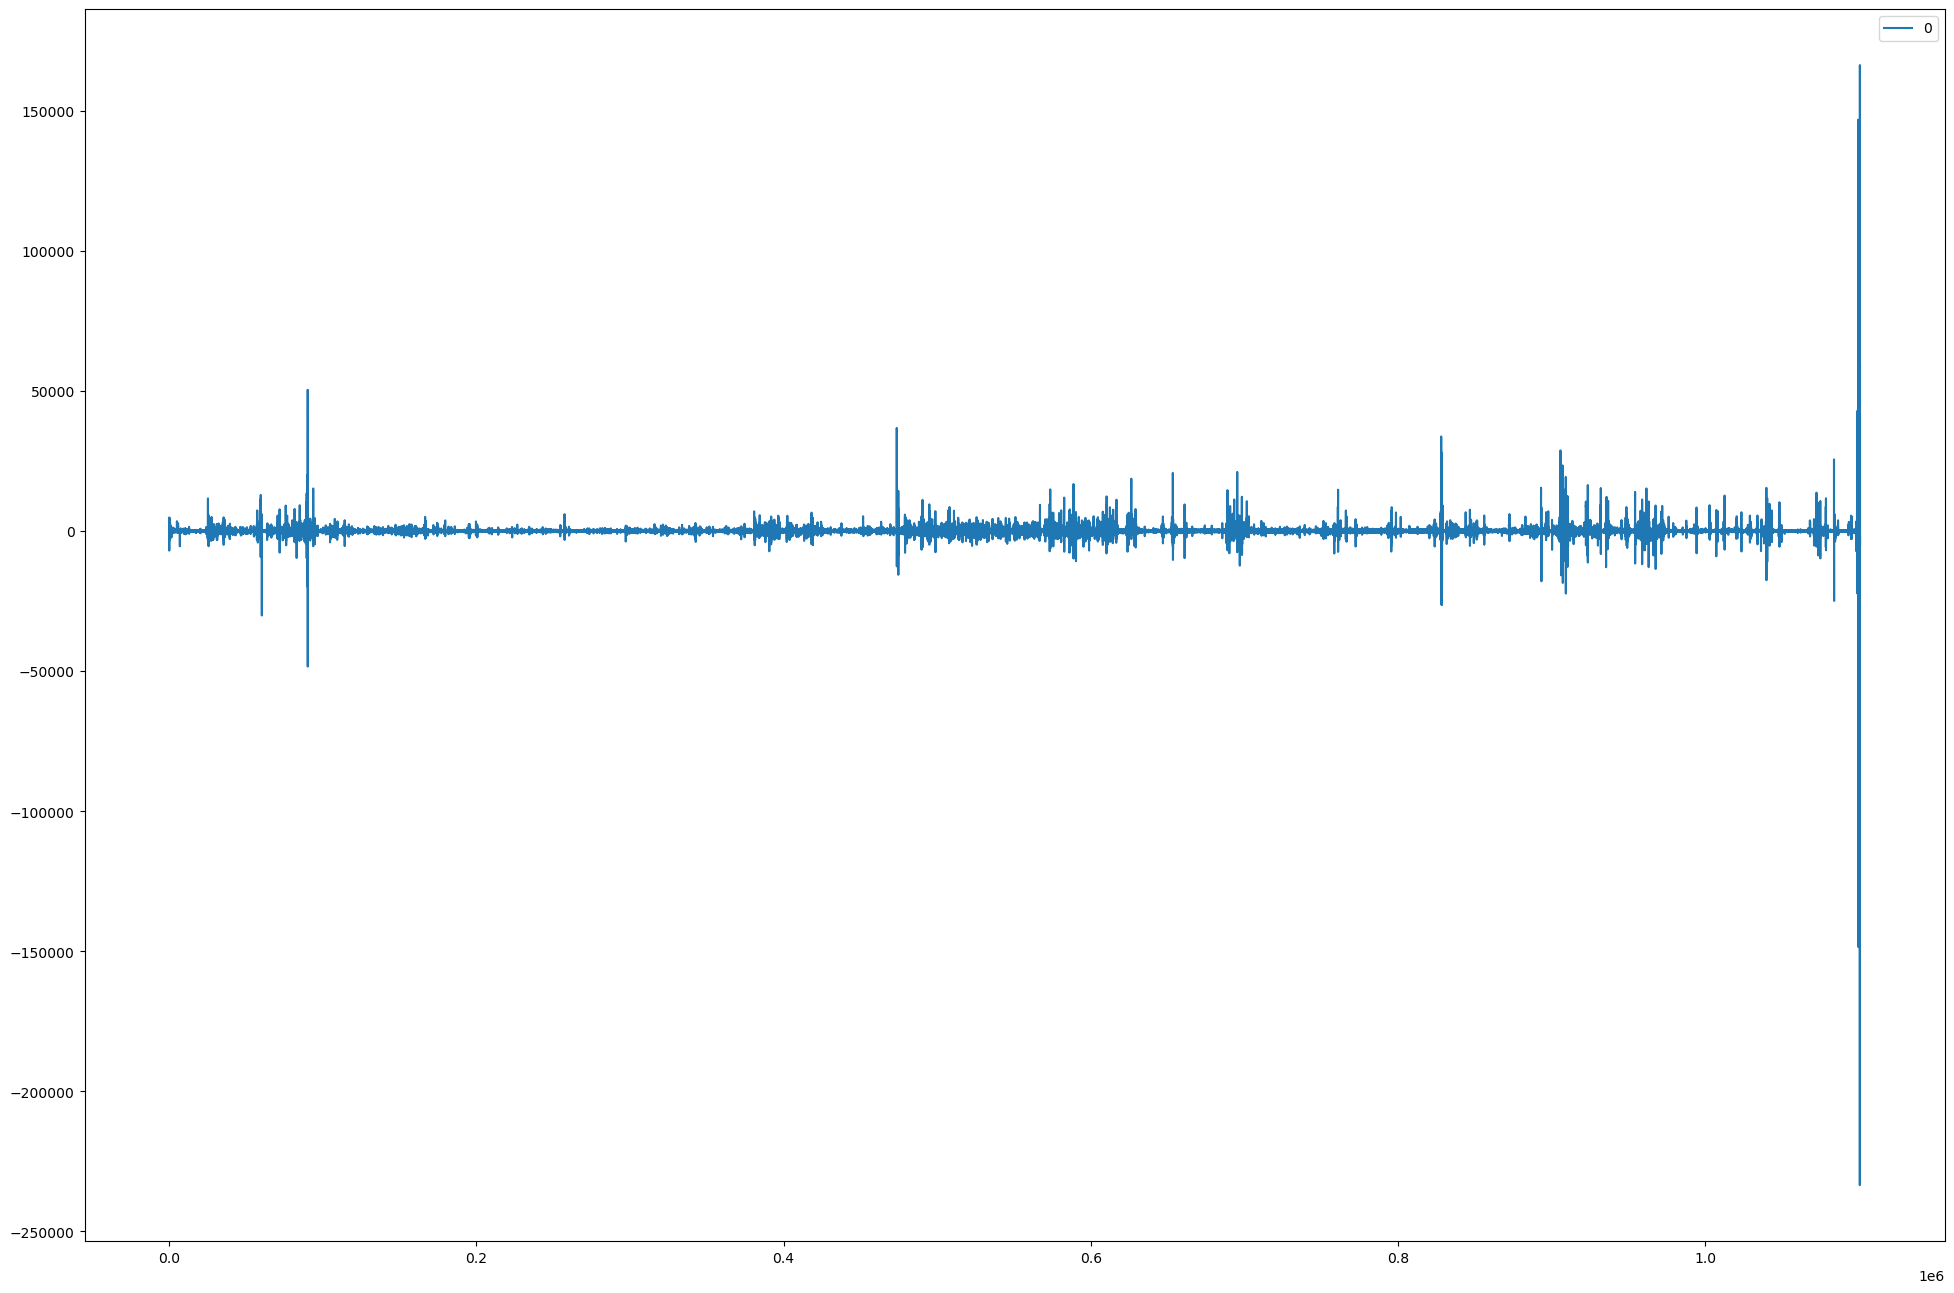

In [77]:
test_detrend.dropna().rolling(25, min_periods=25).mean().dropna().plot()

<AxesSubplot:xlabel='Time'>

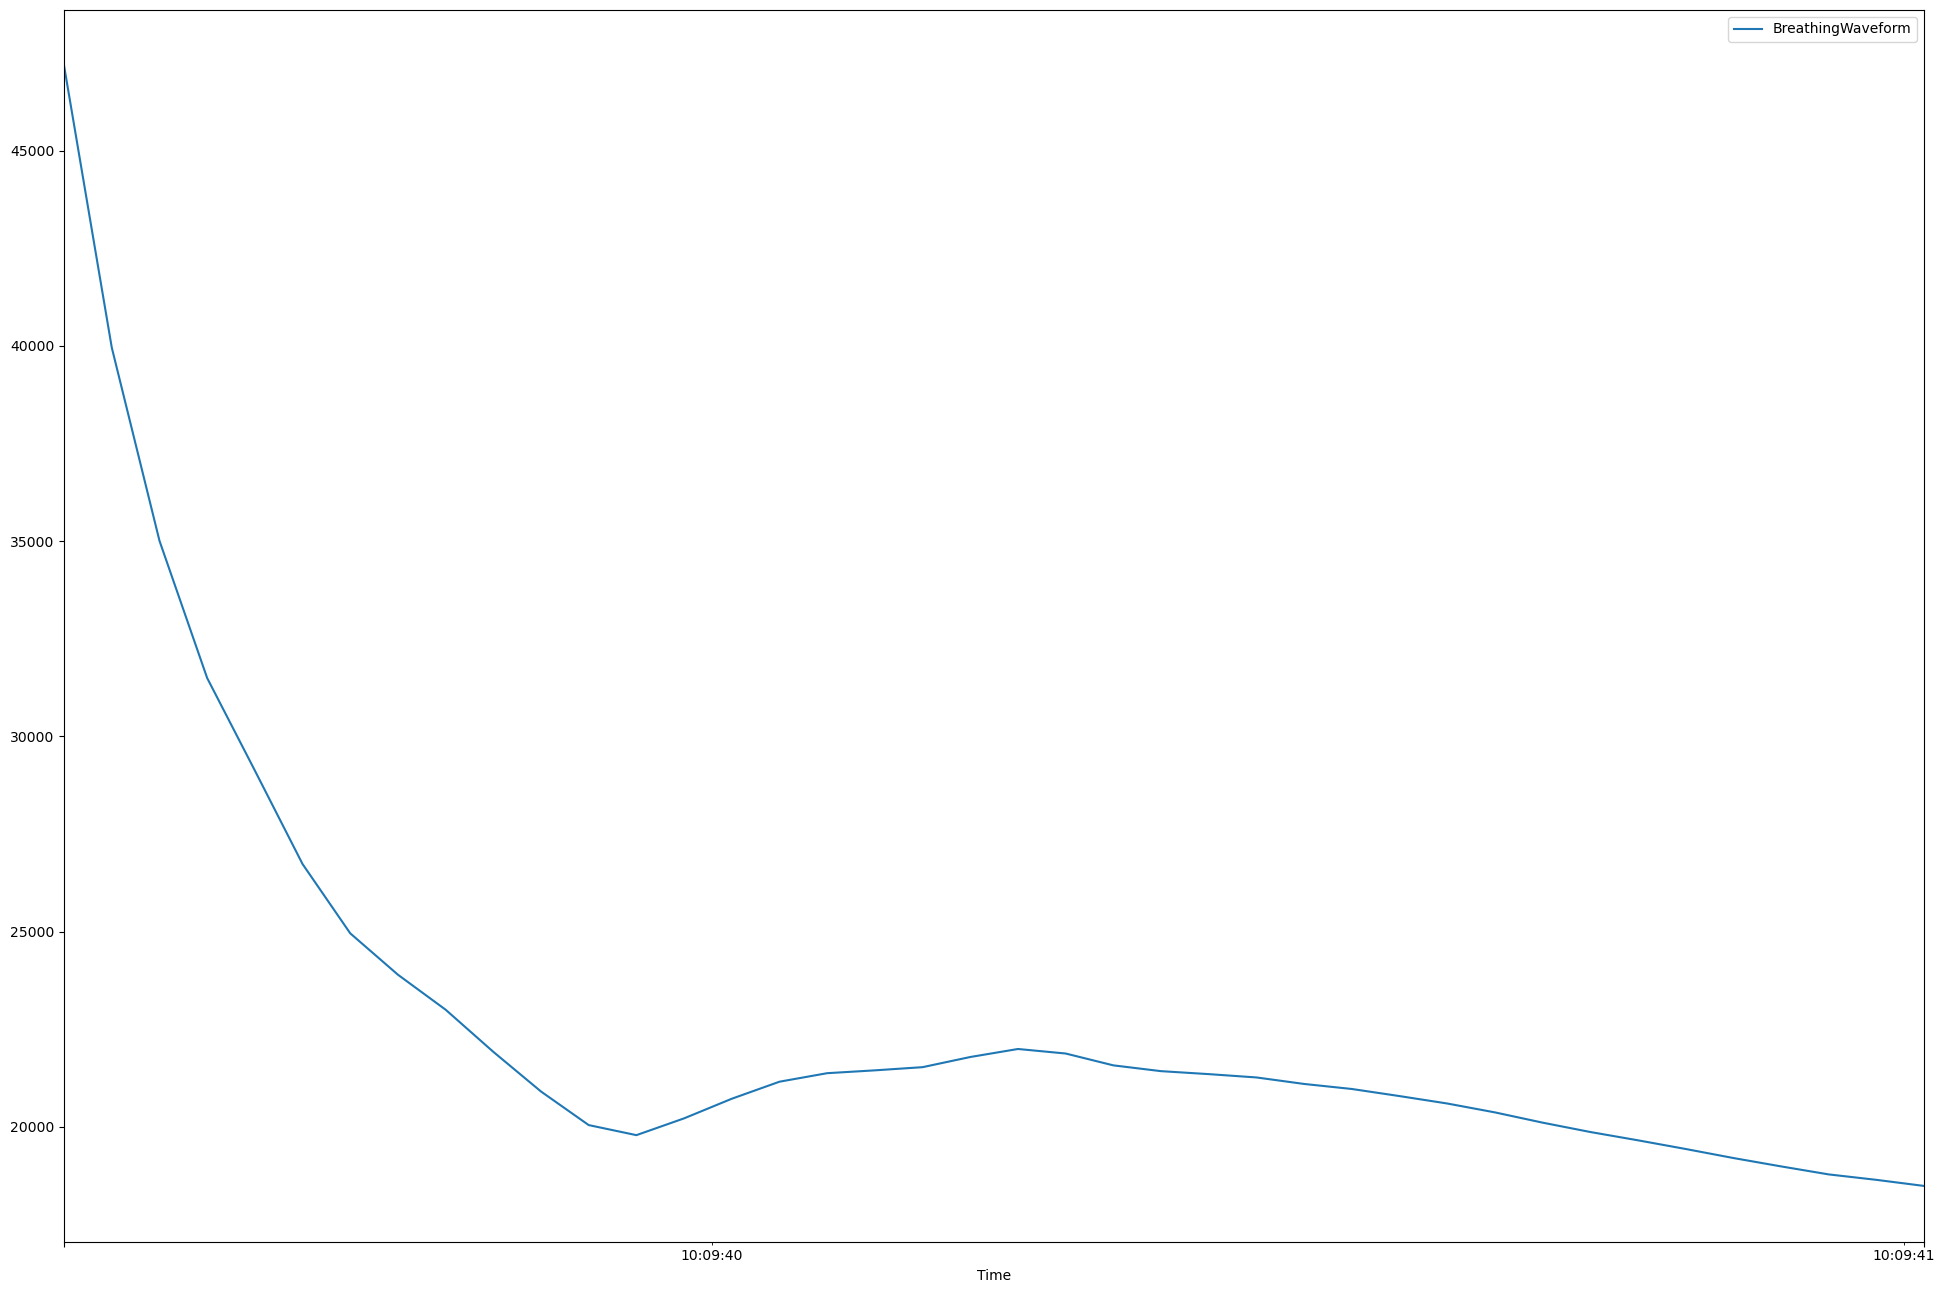

In [25]:
sma_25.head(40).plot()

In [11]:
sma_25

,BreathingWaveform
Time,
2014-10-01 10:09:39.457,0.083040
2014-10-01 10:09:39.497,0.070340
2014-10-01 10:09:39.537,0.061631
2014-10-01 10:09:39.577,0.055442
2014-10-01 10:09:39.617,0.051271
...,...
2014-10-01 22:23:26.217,1.520903
2014-10-01 22:23:26.257,1.521085
2014-10-01 22:23:26.297,1.521267


<AxesSubplot:xlabel='Time'>

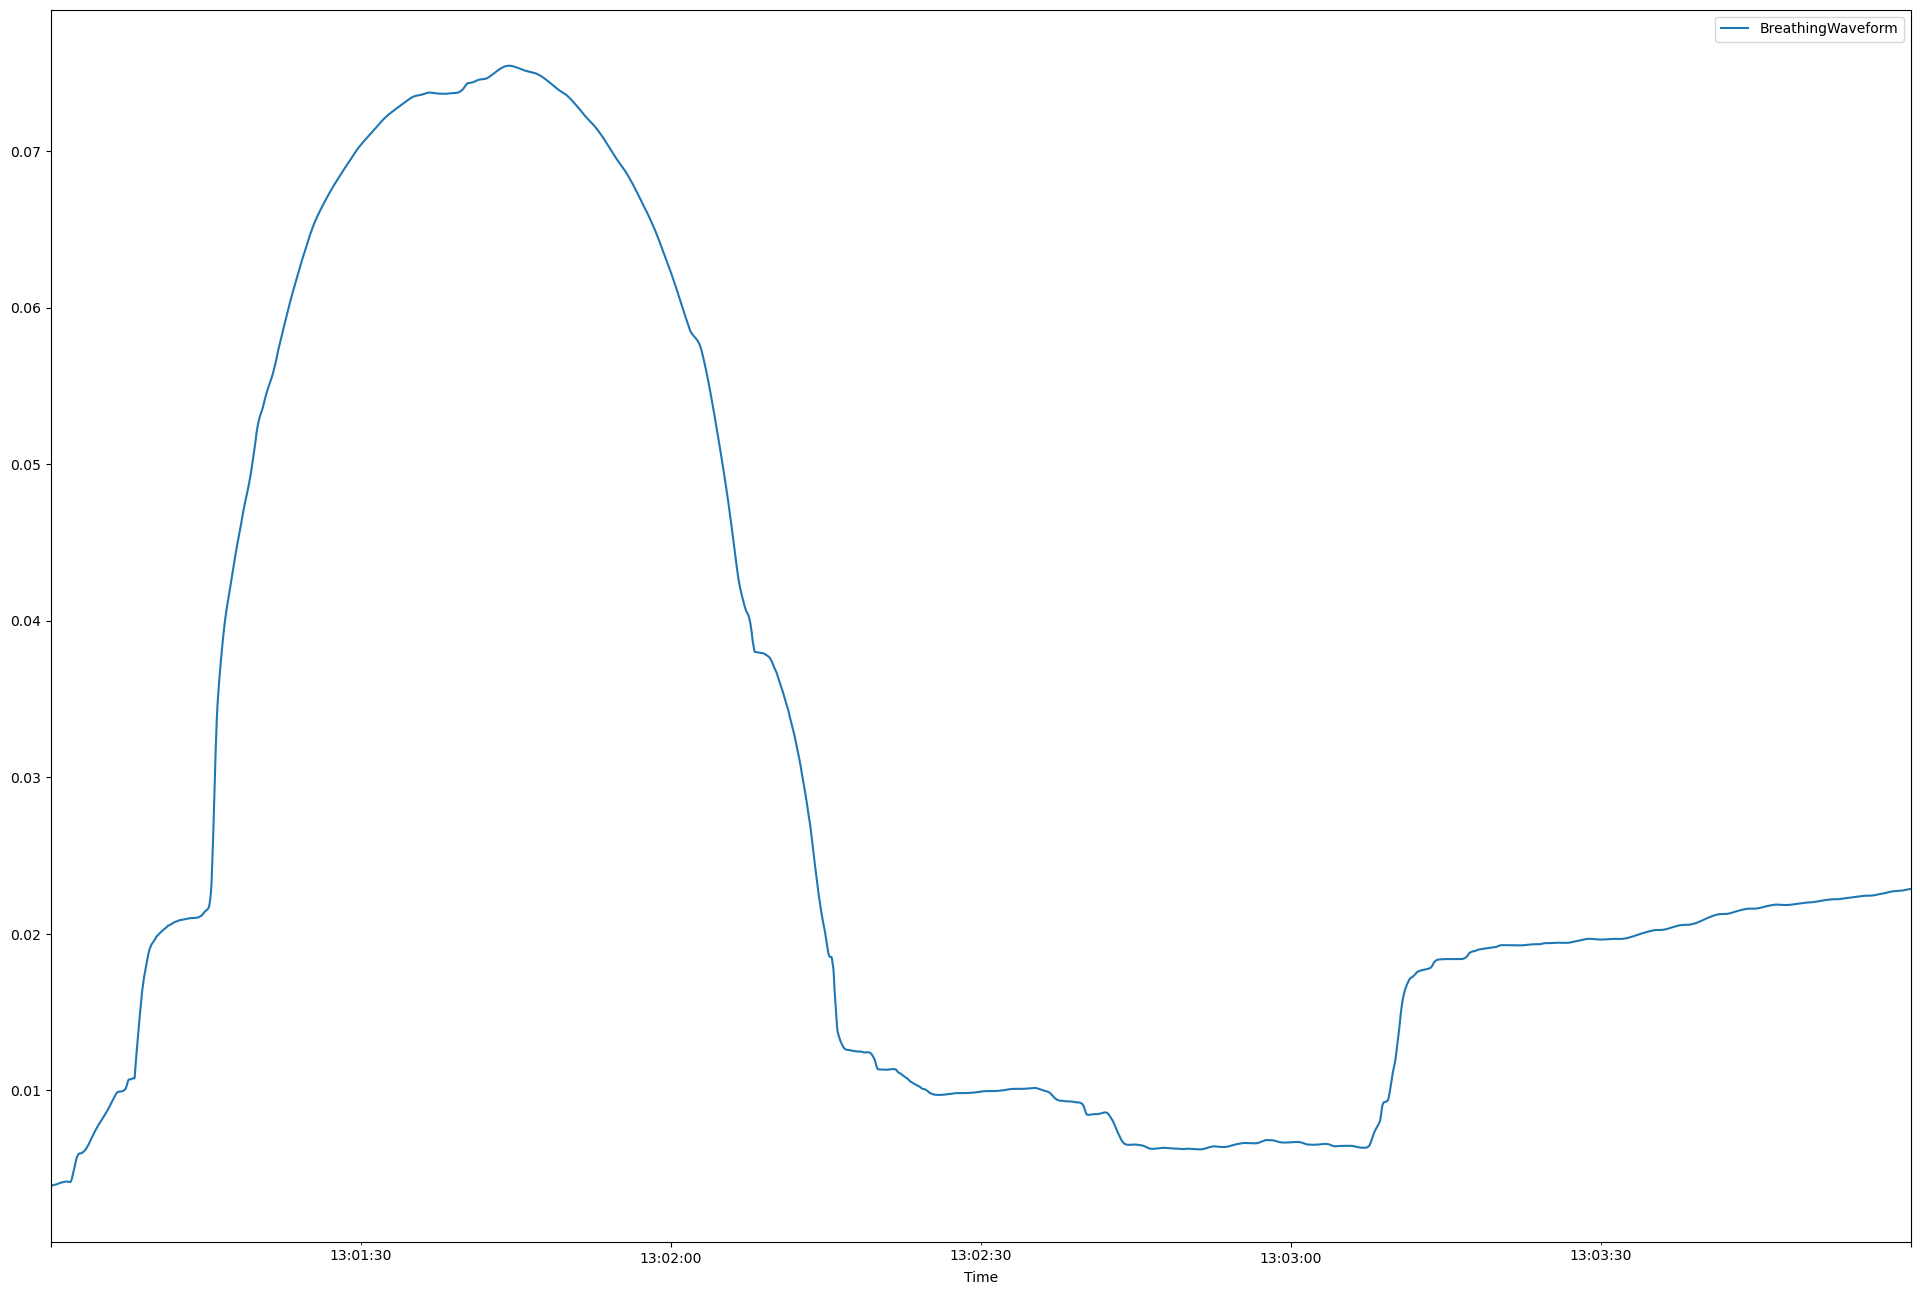

In [12]:
sma_25["2014-10-01 13:01:00":"2014-10-01 13:04:00.0"].plot()

In [ ]:
sma_25.plot()

<AxesSubplot:xlabel='Time'>

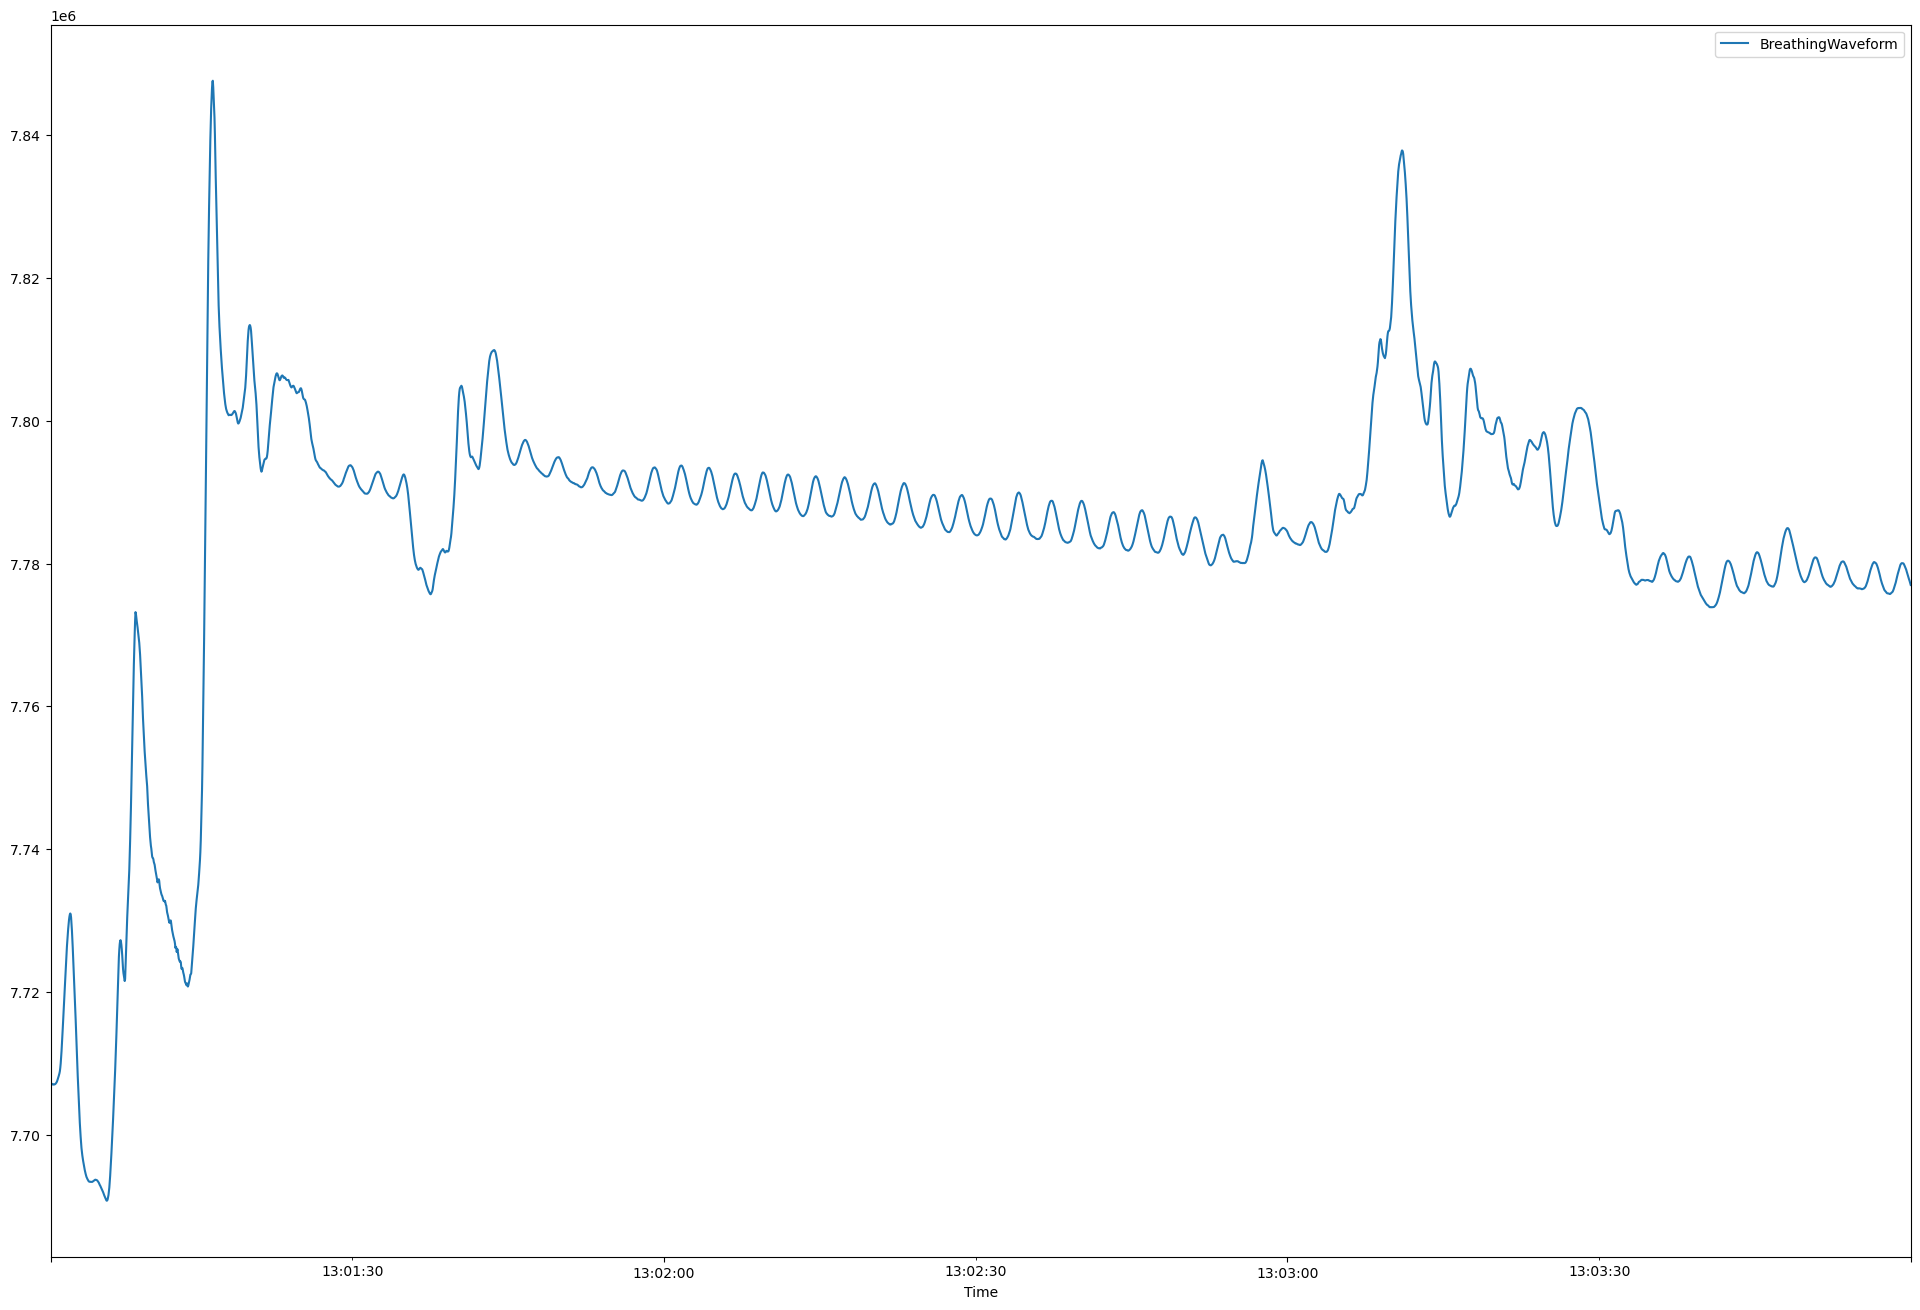

In [51]:
subset.rolling(25, min_periods=25).mean().dropna().plot()

<AxesSubplot:xlabel='Time'>

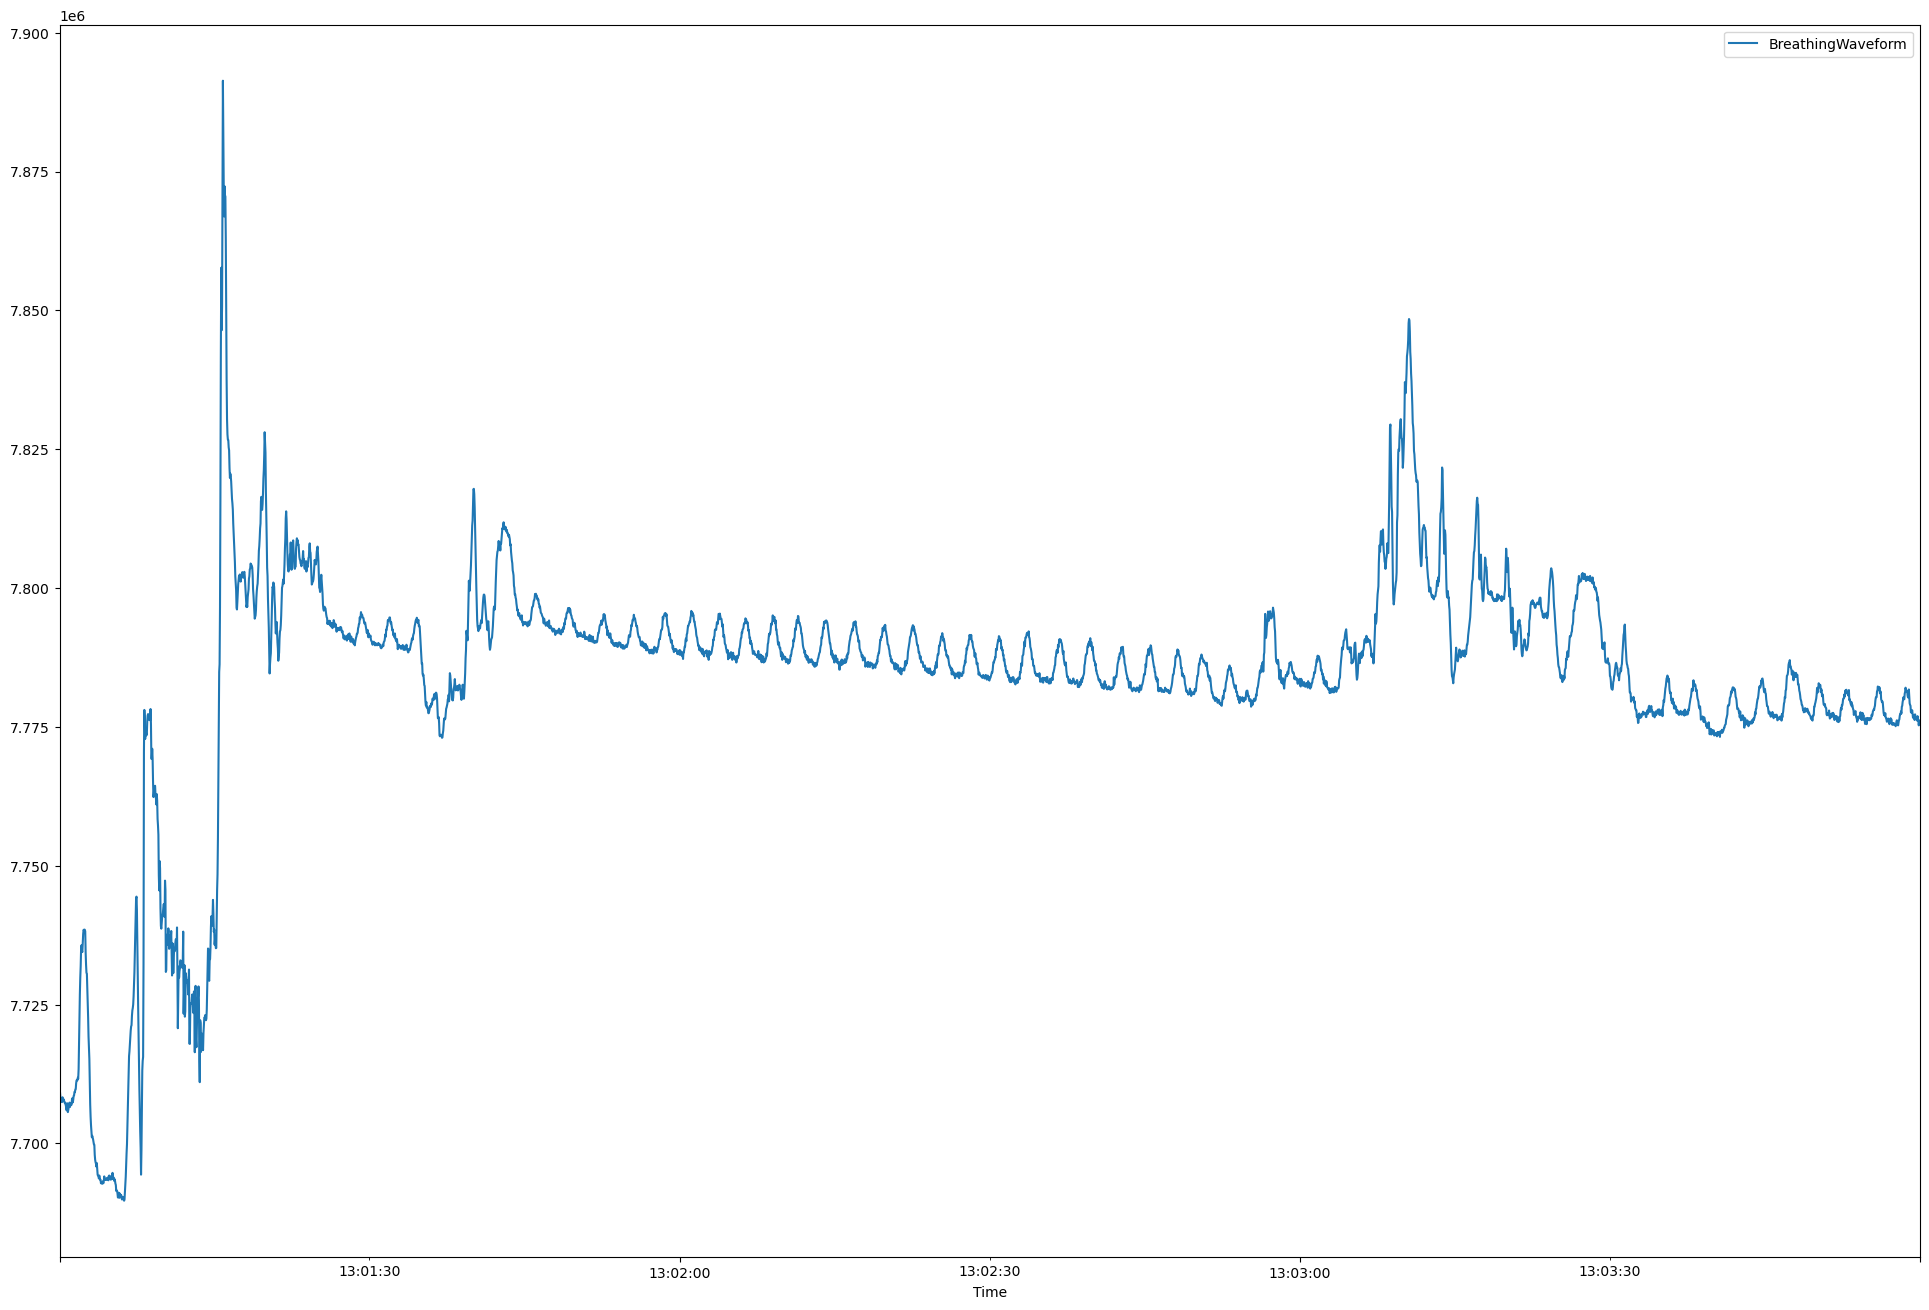

In [44]:
subset = breathing_data["2014-10-01 13:01:00":"2014-10-01 13:04:00.0"]
subset.plot()

In [ ]:
results = seasonal_decompose(subset,extrapolate_trend="freq")
results.plot();